# Working in the frequency domain

This lesson will show:
 * How to transform a time-domain signal into the frequency domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# -- Make a sine wave with 3 componenents

# -- Define the sample rate and time array
fs = 2000  # Hz
time = np.arange(0,5,1/fs)

# -- Define 3 sine waves
sine1 = np.sin(2*np.pi*190*time)
sine2 = np.sin(2*np.pi*220*time)
sine3 = np.sin(2*np.pi*310*time)

# -- Add the components together
data = sine1 + sine2 + sine3

Text(0.5, 1.0, 'Data in the time domain')

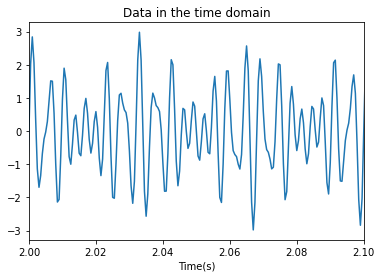

In [3]:
# -- Plot the signal in the time domain
plt.plot(time, data)
plt.xlim(2, 2.1)
plt.xlabel('Time(s)')
plt.title('Data in the time domain')

Text(0.5, 1.0, 'Data in the Frequency Domain')

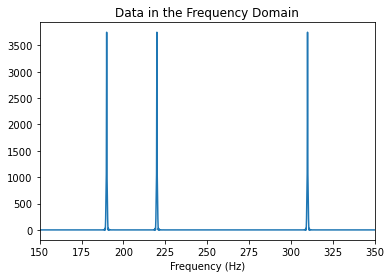

In [4]:
# -- Fast Fourier Transform the signal into the frequency domain

# -- Apply a window
from scipy import signal

# -- The window forces the signal to zeros at the beginning and end.  
# -- This must be done before applying a Fourier Transform
window = signal.tukey(len(data))

# -- Apply the real Fast Fourier Transform (rfft)
data_freq = np.fft.rfft((window*data))  
frequencies = np.fft.rfftfreq(len(data))*fs

plt.plot(frequencies, np.abs(data_freq))
plt.xlim(150,350)
plt.xlabel('Frequency (Hz)')
plt.title("Data in the Frequency Domain")

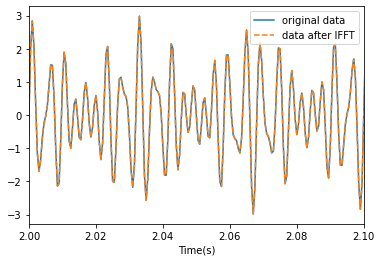

In [8]:
# -- Finally, we can transform back to the time domain
# -- using the "Inverse Fourier Transform"

data_after_ifft = np.fft.irfft(data_freq)

plt.plot(time, data, label='original data')
plt.plot(time,data_after_ifft, '--', label='data after IFFT')
plt.xlim(2, 2.1)
plt.xlabel('Time(s)')
plt.legend(loc=1)
plt.title('Data in the time-domain')

# Check Questions

1. Look at the code under the comment "Define 3 sine waves".  What are the frequencies of the 3 sine waves?

2. Look at the plot of the data in the time domain.  Can you what are the component frequencies?  (Hint: Probably not!)

3. Look at the plot in the frequency domain.  Can you tell what are the component frequencies?  How?



## Practice with python

1. Add a cell below, and try to plot a sine wave with a frequency of 30 Hz.
2. Try plotting the original data and data after IFFT together, but look at the whole range of times.  (Hint: Remove the command np.xlim)  Do you notice any difference?